In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

import seaborn as sns
import matplotlib.pyplot as plt
#yeni kütüphane ekledikten sonra çalıştırmayı unutmayın

In [90]:
df = pd.read_csv('houses_Madrid.csv') #veri setini dahil etme.

In [91]:

df.head(10) #veri ilk 10 satırını gösterir.

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
5,5,21737,Piso en venta en geologia,"San Andrés, Madrid",126.0,114.0,4,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,False,False,True
6,6,21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",120.0,100.0,5,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,False,False,True,False
7,7,21735,Piso en venta en San Andrés,"Villaverde, Madrid",125.0,100.0,3,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,False,False,True,False
8,8,21734,Piso en venta en Butarque,"Villaverde, Madrid",84.0,70.0,3,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
9,9,21733,Piso en venta en calle de Martinez Oviol,"Los Rosales, Madrid",85.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,True,False,False


In [92]:
df.shape #veri setini kaç satır ve sütun oluşturma

(21742, 58)

In [93]:
df.size #veri setinde toplam kaç olduğunu gösterme

1261036

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21742.0,10870.500000,6276.519112,0.0,5435.25,10870.5,16305.75,21741.0
id,21742.0,10871.500000,6276.519112,1.0,5436.25,10871.5,16306.75,21742.0
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.00,100.0,162.00,999.0
sq_mt_useful,8228.0,103.458192,88.259192,1.0,59.00,79.0,113.00,998.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.00,3.0,4.00,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.00,2.0,2.00,16.0
n_floors,1437.0,3.128740,0.907713,1.0,2.00,3.0,4.00,7.0
sq_mt_allotment,1432.0,241.692737,247.484853,1.0,2.00,232.0,354.00,997.0
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

In [97]:
df = df.drop(["latitude", "longitude", "portal", "door", "rent_price_by_area", "are_pets_allowed", "is_furnished", "is_kitchen_equipped","has_private_parking","has_public_parking"], axis=1, errors='ignore')
# boş değer sayısı fazla oaln sütunları veri setinden kaldıralım.
#df=dememizin sebebi drop ile kaldırılan sütunların veri setinden kalıcı olarak silinmesi iç içe aktarılır
#bu satırı bir kez çalıştırdığınızda sütunlar kalıcı olarak kaldırılacağı için tekrar çalışır.

In [98]:
df 

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,NaN,NaN,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,NaN,NaN,en trámite,True,True,0.0,False,False,True,False


In [99]:
df.info()#yeni durumda veri setini inceleyelim. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [100]:
df["is_rent_price_known"] #makaleye göre is_rent_price_known inceleyim

0        False
1        False
2        False
3        False
4        False
         ...  
21737    False
21738    False
21739    False
21740    False
21741    False
Name: is_rent_price_known, Length: 21742, dtype: bool

In [101]:
#veri türü bool olduğu için yalnızca true ya da false değeri alabilir
#o zaman False dışında bir değer var mı kontrol edelim
df[df["is_rent_price_known"]!=False]

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east


In [102]:
#Makalede de dediği gibi hepsi aynı değere sahip olduğu için bu sütunu da silelim
df.drop(["is_rent_price_known"],axis=1, inplace=True)

In [103]:
df

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,NaN,NaN,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,NaN,NaN,en trámite,True,True,0.0,False,False,True,False


In [104]:
df.info() #bbir sütun daha silindi. veri setini tekrar inceleyelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [105]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0
sq_mt_useful,60.0,NaN,54.0,NaN,90.0,114.0,100.0,100.0,70.0,NaN
n_rooms,2,3,2,2,2,4,5,3,3,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
n_floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sq_mt_allotment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Anlamsız değer bulunan kayıtların silinmesi (örneğin negatif fiyat değeri içeren kayıtlar)
df[df["rent_price"]<0].T # .T (transpose) satır ve sütunların yer değiştirmesi için kullanılır

,2499,2516,2517,2531,2560,2583,2584,2591,2694,2699,...,21664,21665,21668,21670,21673,21675,21676,21677,21680,21681
Unnamed: 0,2499,2516,2517,2531,2560,2583,2584,2591,2694,2699,...,21664,21665,21668,21670,21673,21675,21676,21677,21680,21681
id,19243,19226,19225,19211,19182,19159,19158,19151,19048,19043,...,78,77,74,72,69,67,66,65,62,61
title,Dúplex en venta en Cuatro Caminos,Ático en venta en paseo de la Castellana,Dúplex en venta en Cuzco-Castillejos,Ático en venta en Cuatro Caminos,Piso en venta en plaza de Manolete,Piso en venta en Cuatro Caminos,Estudio en venta en Cuzco-Castillejos,Ático en venta en calle del Poeta Joan Maragall,Piso en venta en avenida del General Perón,Piso en venta en paseo de la Castellana,...,Piso en venta en Nueva España,Piso en venta en calle maria de molina,Piso en venta en El Viso,Piso en venta en calle de María de Molina,Casa o chalet independiente en venta en calle...,Chalet adosado en venta en Nueva España,Piso en venta en El Viso,Chalet adosado en venta en El Viso,Chalet adosado en venta en El Viso,Piso en venta en paseo del Prado
subtitle,"Tetuán, Madrid","Cuatro Caminos, Madrid","Tetuán, Madrid","Tetuán, Madrid","Cuatro Caminos, Madrid","Tetuán, Madrid","Tetuán, Madrid","Cuatro Caminos, Madrid","Cuatro Caminos, Madrid","Cuatro Caminos, Madrid",...,"Chamartín, Madrid","El Viso, Madrid","Chamartín, Madrid","El Viso, Madrid","El Viso, Madrid","Chamartín, Madrid","Chamartín, Madrid","Chamartín, Madrid","Chamartín, Madrid","Huertas-Cortes, Madrid"
sq_mt_built,257.0,257.0,295.0,257.0,203.0,200.0,300.0,257.0,360.0,203.0,...,379.0,399.0,432.0,399.0,469.0,351.0,220.0,432.0,395.0,230.0
sq_mt_useful,NaN,NaN,261.0,NaN,NaN,NaN,NaN,NaN,NaN,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_rooms,3,3,4,3,4,4,0,3,5,4,...,5,5,6,5,5,4,4,2,4,4
n_bathrooms,3.0,4.0,4.0,4.0,4.0,3.0,1.0,4.0,4.0,4.0,...,4.0,4.0,5.0,5.0,6.0,5.0,3.0,3.0,4.0,2.0
n_floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,3.0,NaN
sq_mt_allotment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,244.0,350.0,NaN


In [107]:
#rent_price sütununda negatif değerler olduğunu gördük bunları silelim
#daha doğrusu sıfırdan büyük olan değerleri dataframe'e aktaralım.
df=df.loc[df["rent_price"]>0]

In [108]:
df

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,NaN,NaN,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,NaN,NaN,en trámite,True,True,0.0,False,False,True,False


In [109]:
#aynı işlemi buy_price için de yapalım
df=df.loc[df["buy_price"]>0]

In [110]:
df

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,NaN,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,NaN,NaN,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,NaN,NaN,en trámite,True,True,0.0,False,False,True,False


In [111]:
#Veri setini tekrar inceleyelim
df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol,...,Piso en venta en calle Júpiter,Casa o chalet independiente en venta en aveni...,Piso en venta en calle Galeón,Piso en venta en calle Bahía de Almería,Piso en venta en calle Bahía de Alicante,Ático en venta en Casco Histórico de Barajas,Piso en venta en Urb. Campo de las Naciones - ...,Piso en venta en Campo de las Naciones-Corralejos,"Chalet adosado en venta en calle Burriana, 12","Piso en venta en calle San Epifanio, 9"
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid",...,"Casco Histórico de Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Alameda de Osuna, Madrid","Campo de las Naciones-Corralejos, Madrid","Campo de las Naciones-Corralejos, Madrid","Barajas, Madrid","Barajas, Madrid","Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Imperial, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
sq_mt_useful,60.0,NaN,54.0,NaN,90.0,114.0,100.0,100.0,70.0,NaN,...,NaN,215.0,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
n_floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
sq_mt_allotment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,304.0,NaN


In [112]:
#tittle, subtitle, is_exact_address_hidden, neighborhood_id sütunlarını da kaldırabiliriz.
#has_central_heating (merkezi ısıtma) ve has_individual_heating (bireysel ısıtma)	birbirinin tam zıttı biri tru iken diğeri false birini kaldırabiliriz.
df=df.drop(columns=["title","subtitle","is_exact_address_hidden","neighborhood_id","has_individual_heating"])

In [113]:
df

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,64.0,60.0,2,1.0,NaN,NaN,"Calle de Godella, 64",Calle de Godella,...,NaN,NaN,D,False,NaN,NaN,False,True,False,False
1,1,21741,70.0,NaN,3,1.0,NaN,NaN,Calle de la del Manojo de Rosas,Calle de la del Manojo de Rosas,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,94.0,54.0,2,2.0,NaN,NaN,"Calle del Talco, 68",Calle del Talco,...,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,64.0,NaN,2,1.0,NaN,NaN,Calle Pedro Jiménez,Calle Pedro Jiménez,...,True,NaN,en trámite,False,NaN,NaN,False,False,True,False
4,4,21738,108.0,90.0,2,2.0,NaN,NaN,Carretera de Villaverde a Vallecas,Carretera de Villaverde a Vallecas,...,NaN,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,96.0,83.0,2,2.0,NaN,NaN,Urb. Campo de las Naciones - Corralejos,Urb. Campo de las Naciones - Corralejos,...,NaN,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,175.0,NaN,4,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,289.0,NaN,4,3.0,3.0,304.0,"Calle Burriana, 12",Calle Burriana,...,NaN,NaN,en trámite,True,True,0.0,False,False,True,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   sq_mt_useful                  7760 non-null   float64
 4   n_rooms                       19095 non-null  int64  
 5   n_bathrooms                   19081 non-null  float64
 6   n_floors                      669 non-null    float64
 7   sq_mt_allotment               527 non-null    float64
 8   raw_address                   15088 non-null  object 
 9   street_name                   14670 non-null  object 
 10  street_number                 6059 non-null   object 
 11  floor                         17596 non-null  object 
 12  is_floor_under                18265 non-null  object 
 13  operat

In [115]:
# has_ac, has_fitted_wardrobes, has_garden, has_pool, has_terrace, has_balcony, has_storage_room, is_accessible, has_green_zones, is_parking_included_in_price
df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']] = df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']].fillna(False)

In [116]:
df

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,64.0,60.0,2,1.0,NaN,NaN,"Calle de Godella, 64",Calle de Godella,...,False,False,D,False,False,NaN,False,True,False,False
1,1,21741,70.0,NaN,3,1.0,NaN,NaN,Calle de la del Manojo de Rosas,Calle de la del Manojo de Rosas,...,False,False,en trámite,False,False,NaN,NaN,NaN,NaN,NaN
2,2,21740,94.0,54.0,2,2.0,NaN,NaN,"Calle del Talco, 68",Calle del Talco,...,False,False,no indicado,False,False,NaN,NaN,NaN,NaN,NaN
3,3,21739,64.0,NaN,2,1.0,NaN,NaN,Calle Pedro Jiménez,Calle Pedro Jiménez,...,True,False,en trámite,False,False,NaN,False,False,True,False
4,4,21738,108.0,90.0,2,2.0,NaN,NaN,Carretera de Villaverde a Vallecas,Carretera de Villaverde a Vallecas,...,False,True,en trámite,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,...,False,False,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,96.0,83.0,2,2.0,NaN,NaN,Urb. Campo de las Naciones - Corralejos,Urb. Campo de las Naciones - Corralejos,...,False,True,en trámite,True,True,0.0,False,True,True,True
21739,21739,3,175.0,NaN,4,2.0,NaN,NaN,NaN,NaN,...,False,False,E,True,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,289.0,NaN,4,3.0,3.0,304.0,"Calle Burriana, 12",Calle Burriana,...,False,False,en trámite,True,True,0.0,False,False,True,False


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   sq_mt_useful                  7760 non-null   float64
 4   n_rooms                       19095 non-null  int64  
 5   n_bathrooms                   19081 non-null  float64
 6   n_floors                      669 non-null    float64
 7   sq_mt_allotment               527 non-null    float64
 8   raw_address                   15088 non-null  object 
 9   street_name                   14670 non-null  object 
 10  street_number                 6059 non-null   object 
 11  floor                         17596 non-null  object 
 12  is_floor_under                18265 non-null  object 
 13  operat

In [118]:
#bu işlem için chatgpt'den birden fazla sütun için label encoding kullanımı diye aratabilirsiniz
#label encoding için sklearn kütüphanesini ekleyeceğiz.
#kütüphane ekleme işlemlerini ilk satırda yapalım (en üstte)
# LabelEncoder'ı her sütun için uygulama
encoder = LabelEncoder()

for column in ['energy_certificate', 'house_type_id','operation','street_name']:
    df[column] = encoder.fit_transform(df[column])

In [119]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
sq_mt_useful,60.0,NaN,54.0,NaN,90.0,114.0,100.0,100.0,70.0,NaN,...,NaN,215.0,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
n_floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
sq_mt_allotment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,304.0,NaN
raw_address,"Calle de Godella, 64",Calle de la del Manojo de Rosas,"Calle del Talco, 68",Calle Pedro Jiménez,Carretera de Villaverde a Vallecas,geologia,Avenida Real de Pinto,NaN,NaN,Calle de Martinez Oviol,...,Calle Júpiter,Avenida de Logroño,Calle Galeón,Calle Bahía de Almería,Calle Bahía de Alicante,NaN,Urb. Campo de las Naciones - Corralejos,NaN,"Calle Burriana, 12","Calle San Epifanio, 9"
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165,...,1614,261,1339,737,736,5812,5363,5812,811,2259


In [120]:
#kalan bazı sütunları da kaldıralım
df=df.drop(columns=["Unnamed: 0","id","is_floor_under","operation","buy_price_by_area","is_buy_price_known","house_type_id","has_central_heating","is_exterior","is_accessible","floor"])

In [121]:
df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,street_number,rent_price,...,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,64.0,60.0,2,1.0,NaN,NaN,"Calle de Godella, 64",2987,64,471,...,False,False,3,False,False,NaN,False,True,False,False
1,70.0,NaN,3,1.0,NaN,NaN,Calle de la del Manojo de Rosas,3715,NaN,666,...,False,False,7,False,False,NaN,NaN,NaN,NaN,NaN
2,94.0,54.0,2,2.0,NaN,NaN,"Calle del Talco, 68",4075,68,722,...,True,False,9,False,False,NaN,NaN,NaN,NaN,NaN
3,64.0,NaN,2,1.0,NaN,NaN,Calle Pedro Jiménez,1989,NaN,583,...,True,False,7,False,False,NaN,False,False,True,False
4,108.0,90.0,2,2.0,NaN,NaN,Carretera de Villaverde a Vallecas,4273,NaN,1094,...,True,True,7,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,78.0,NaN,2,2.0,NaN,NaN,NaN,5812,NaN,1323,...,True,False,7,True,True,0.0,NaN,NaN,NaN,NaN
21738,96.0,83.0,2,2.0,NaN,NaN,Urb. Campo de las Naciones - Corralejos,5363,NaN,1496,...,True,True,7,True,True,0.0,False,True,True,True
21739,175.0,NaN,4,2.0,NaN,NaN,NaN,5812,NaN,2081,...,True,False,4,True,True,0.0,NaN,NaN,NaN,NaN
21740,289.0,NaN,4,3.0,3.0,304.0,"Calle Burriana, 12",811,12,2115,...,True,False,7,True,True,0.0,False,False,True,False


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   sq_mt_useful                  7760 non-null   float64
 2   n_rooms                       19095 non-null  int64  
 3   n_bathrooms                   19081 non-null  float64
 4   n_floors                      669 non-null    float64
 5   sq_mt_allotment               527 non-null    float64
 6   raw_address                   15088 non-null  object 
 7   street_name                   19095 non-null  int32  
 8   street_number                 6059 non-null   object 
 9   rent_price                    19095 non-null  int64  
 10  buy_price                     19095 non-null  int64  
 11  is_renewal_needed             19095 non-null  bool   
 12  is_new_development            18176 non-null  object 
 13  built_

In [123]:
#df['built_year'] = df['built_year'].fillna(df['built_year'].min())
df['built_year'] = df['built_year'].fillna(1960)

In [124]:
df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,street_number,rent_price,...,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,64.0,60.0,2,1.0,NaN,NaN,"Calle de Godella, 64",2987,64,471,...,False,False,3,False,False,NaN,False,True,False,False
1,70.0,NaN,3,1.0,NaN,NaN,Calle de la del Manojo de Rosas,3715,NaN,666,...,False,False,7,False,False,NaN,NaN,NaN,NaN,NaN
2,94.0,54.0,2,2.0,NaN,NaN,"Calle del Talco, 68",4075,68,722,...,True,False,9,False,False,NaN,NaN,NaN,NaN,NaN
3,64.0,NaN,2,1.0,NaN,NaN,Calle Pedro Jiménez,1989,NaN,583,...,True,False,7,False,False,NaN,False,False,True,False
4,108.0,90.0,2,2.0,NaN,NaN,Carretera de Villaverde a Vallecas,4273,NaN,1094,...,True,True,7,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,78.0,NaN,2,2.0,NaN,NaN,NaN,5812,NaN,1323,...,True,False,7,True,True,0.0,NaN,NaN,NaN,NaN
21738,96.0,83.0,2,2.0,NaN,NaN,Urb. Campo de las Naciones - Corralejos,5363,NaN,1496,...,True,True,7,True,True,0.0,False,True,True,True
21739,175.0,NaN,4,2.0,NaN,NaN,NaN,5812,NaN,2081,...,True,False,4,True,True,0.0,NaN,NaN,NaN,NaN
21740,289.0,NaN,4,3.0,3.0,304.0,"Calle Burriana, 12",811,12,2115,...,True,False,7,True,True,0.0,False,False,True,False


In [125]:
df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,street_number,rent_price,...,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,64.0,60.0,2,1.0,NaN,NaN,"Calle de Godella, 64",2987,64,471,...,False,False,3,False,False,NaN,False,True,False,False
1,70.0,NaN,3,1.0,NaN,NaN,Calle de la del Manojo de Rosas,3715,NaN,666,...,False,False,7,False,False,NaN,NaN,NaN,NaN,NaN
2,94.0,54.0,2,2.0,NaN,NaN,"Calle del Talco, 68",4075,68,722,...,True,False,9,False,False,NaN,NaN,NaN,NaN,NaN
3,64.0,NaN,2,1.0,NaN,NaN,Calle Pedro Jiménez,1989,NaN,583,...,True,False,7,False,False,NaN,False,False,True,False
4,108.0,90.0,2,2.0,NaN,NaN,Carretera de Villaverde a Vallecas,4273,NaN,1094,...,True,True,7,True,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,78.0,NaN,2,2.0,NaN,NaN,NaN,5812,NaN,1323,...,True,False,7,True,True,0.0,NaN,NaN,NaN,NaN
21738,96.0,83.0,2,2.0,NaN,NaN,Urb. Campo de las Naciones - Corralejos,5363,NaN,1496,...,True,True,7,True,True,0.0,False,True,True,True
21739,175.0,NaN,4,2.0,NaN,NaN,NaN,5812,NaN,2081,...,True,False,4,True,True,0.0,NaN,NaN,NaN,NaN
21740,289.0,NaN,4,3.0,3.0,304.0,"Calle Burriana, 12",811,12,2115,...,True,False,7,True,True,0.0,False,False,True,False


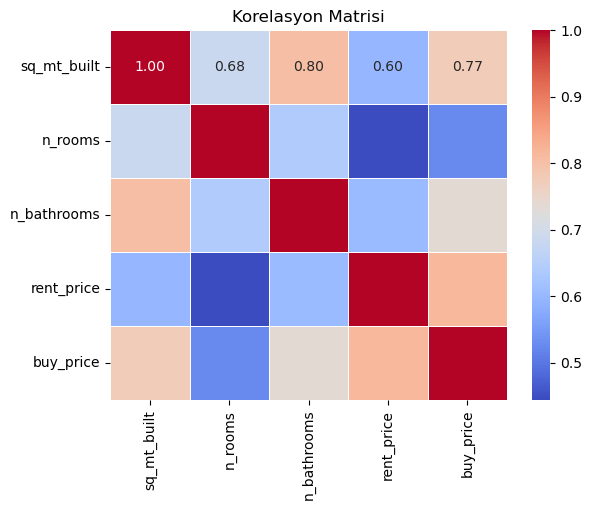

In [126]:
#korelasyon matrisine bakalım
columns_of_interest = ['sq_mt_built', 'n_rooms','n_bathrooms','rent_price','buy_price']
# Seçilen sütunlar için korelasyon matrisini hesaplama
corr_matrix = df[columns_of_interest].corr()
# Korelasyon matrisini görselleştirme
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [143]:
# # Boş veriler içeren satırları silme (makine öğrenmesi adımında hata verdiği için)
df = df.dropna()

In [144]:
df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,street_number,rent_price,...,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east


In [145]:
#SVM makine öğrenmesi modeli oluşturma
X = df.drop('buy_price', axis=1)  # Özellikler (bağımsız değişkenler)
y = df['buy_price']  # Etiket (bağımlı değişken)

In [146]:
df

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,street_name,street_number,rent_price,...,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east


In [ ]:
#Veriyi Eğitim ve Test Setlerine Ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modeli Test Etme
# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

In [ ]:
# Sonuçları değerlendirme
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
